### **Detecção e Redução de Fraudes no Setor Financeiro**

# Bibliotecas e dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Bibliotecas para classificação
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from yellowbrick.classifier.rocauc import roc_auc
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import auc, plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTEENN
from collections import Counter
from collections import Counter
from sklearn import metrics
from imblearn.under_sampling import ClusterCentroids
from yellowbrick.classifier import ROCAUC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [2]:
data_fraude = pd.read_csv('fraud_detection_dataset.csv')

In [3]:
fraude = data_fraude[:]
#fraude = data_fraude.tail(1000000) #Selecionando apenas 100000 

In [4]:
fraude

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# EDA

In [5]:
# Verificando os tipos de dados do dataset 
fraude.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
# Verificando valores ausentes. #Não há valores ausentes
fraude.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
# Verificando dados que foram classificados como fraude
fraude[fraude['isFraud'] ==1][:20]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
681,1,CASH_OUT,20128.00,C1118430673,20128.00,0.0,C339924917,6268.00,12145.85,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.00,0.00,1,0
970,1,CASH_OUT,1277212.77,C467632528,1277212.77,0.0,C716083600,0.00,2444985.19,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.00,0.00,1,0


As fraudes acontecem em TRANSFER e CASH_OUT

In [8]:
# Verificando dados que foram classificados como fraude por transferência >200.000 
fraude[:][fraude['isFlaggedFraud'] == 1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


Dos 16 registros de fraude com valor >200.000, TODOS possuem as variáveis oldbalanceDest e newbalanceDest com 0.

As variáveis oldbalanceOrg e newbalanceOrg também possuem exatamente o mesmo valor, não é descontado o valor em dinheiro na transação.

In [9]:
fraude.describe() # A diferença de intervalos nos valores numéricos implica necessidade de normalização

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [10]:
# Verificar a distribuição da variável type, para ver quando a fraude ocorre com mais frequência

print(fraude['type'].value_counts())

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


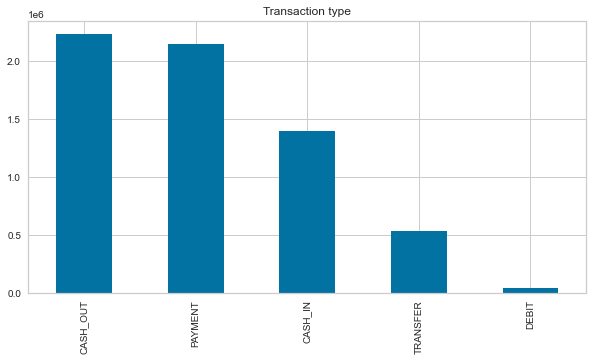

In [11]:
# Verificar a distribuição da variável type, para ver quando a fraude ocorre com mais frequência
print(fraude.type.value_counts())

f, ax = plt.subplots(figsize=(10, 5))
fraude.type.value_counts().plot(kind='bar', title="Transaction type", ax=ax, figsize=(10,5))
plt.show()

In [12]:
fraude_isFraud = fraude[(fraude['isFraud'] == 1)]
fraude_isFraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


0    6354407
1       8213
Name: isFraud, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

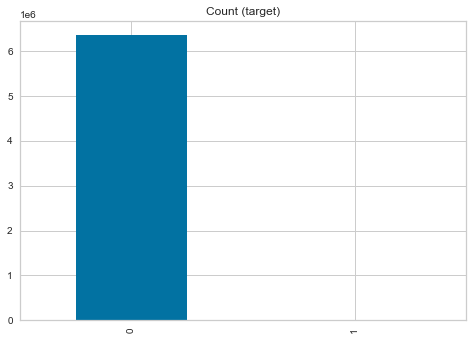

In [13]:
print(fraude['isFraud'].value_counts()) # De 6354407 dados, 8213 são fraude
fraude['isFraud'].value_counts().plot(kind='bar', title='Count (target)')

[Text(0, 0, 'Not Fraud'), Text(1, 0, 'Fraud')]

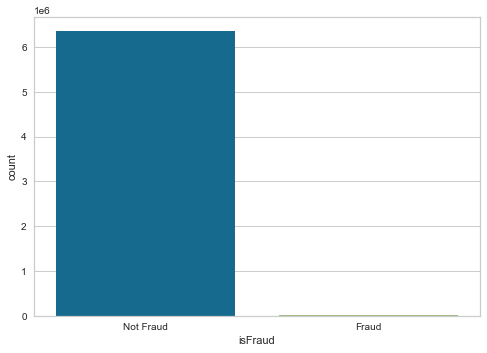

In [14]:
g = sns.countplot('isFraud', data=fraude)
g.set_xticklabels(['Not Fraud', 'Fraud'])

In [15]:
# Quais tipos de transações são mais comuns ao cometer fraudes?
print(fraude[(fraude['isFraud'] == 1)]['type'].value_counts())

CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64


<AxesSubplot:xlabel='isFraud', ylabel='amount'>

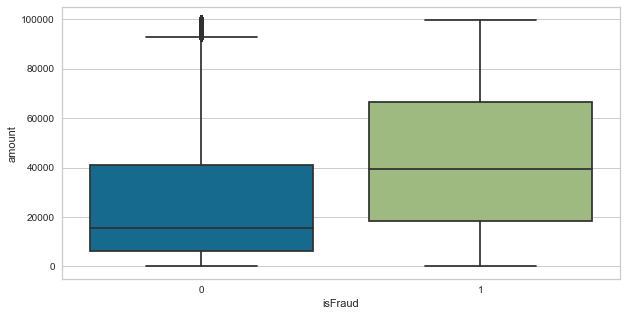

In [16]:
# Distribuicao de isFraud com amount
plt.figure(figsize=(10,5))
sns.boxplot(x = 'isFraud', y = 'amount', data = fraude[fraude.amount < 1e5]) #Fraude mais comum com valores mais altos

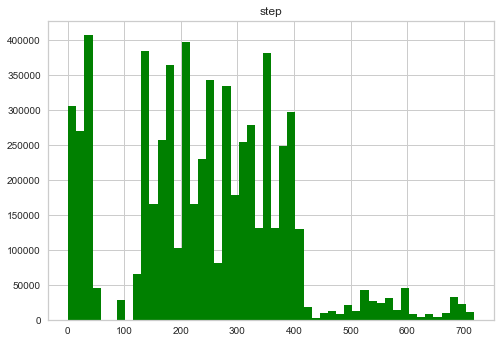

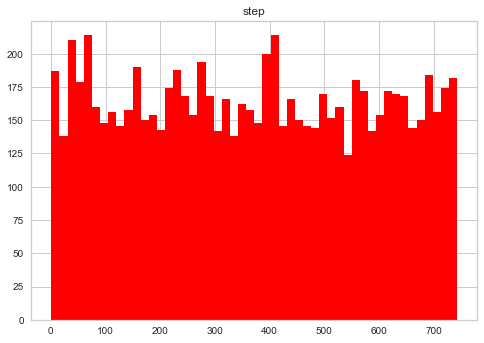

<Figure size 288x144 with 0 Axes>

In [17]:
# Variável step é o momento da simulação (30 dias), em que a transação é realizada
bins = 50

fraude[(fraude['isFraud'] == 0)].hist(column="step",color="green",bins=bins)

fraude[(fraude['isFraud'] == 1)].hist(column ="step",color="red",bins=bins)

plt.figure(figsize=(4,2))
plt.show()

Após a etapa 400 as transações reais diminuem consideravelmente, enquanto as fraudulentas permanecem constantes.

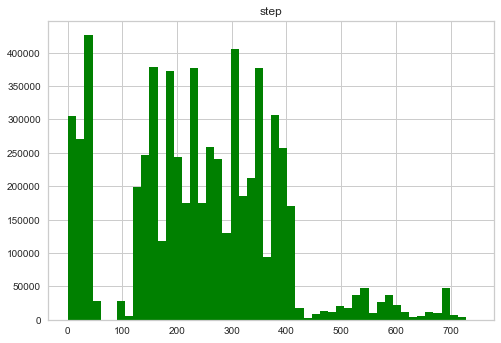

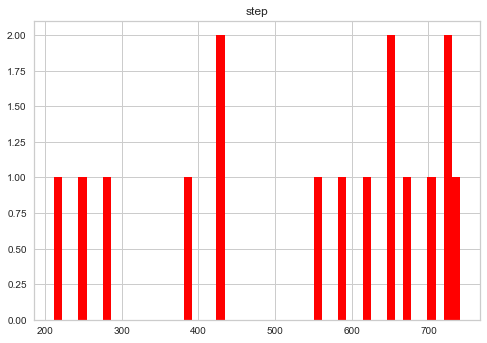

<Figure size 288x144 with 0 Axes>

In [18]:
bins = 50

fraude[(fraude['isFlaggedFraud'] == 0)].hist(column="step",color="green",bins=bins)

fraude[(fraude['isFlaggedFraud'] == 1)].hist(column ="step",color="red",bins=bins)

plt.figure(figsize=(4,2))
plt.show()

In [19]:
# Criando variáveis dummy e eliminando as categóricas
# Eliminando as contas de destino e origem porque não foram consideradas variáveis importantes
dataset = pd.concat([fraude.drop(columns=['isFraud','isFlaggedFraud']),pd.get_dummies(fraude.type)] ,axis=1)
dataset = dataset.drop(['type', 'nameOrig', 'nameDest'],1)
dataset = pd.concat([dataset,fraude.iloc[:,-2:]],axis=1)
pd.DataFrame.head(dataset)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0,0,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,1,1,0
3,1,181.00,181.0,0.00,21182.0,0.0,0,1,0,0,0,1,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0,0,0


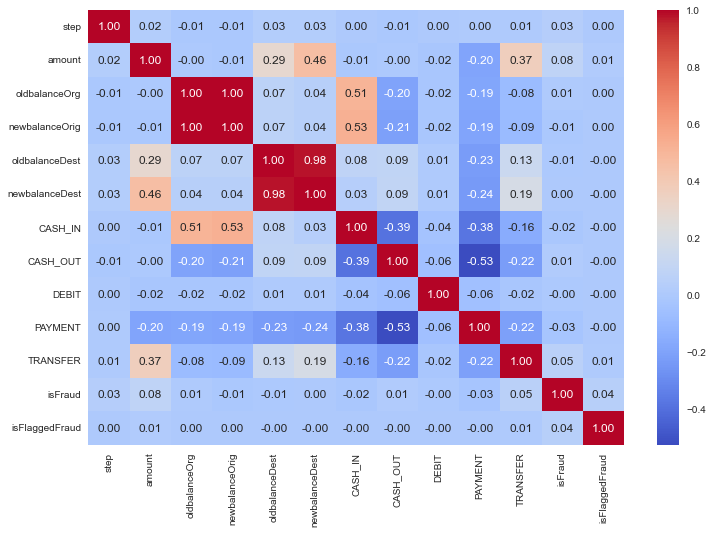

In [20]:
# Verificar a matriz de correlação entre as features
sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))

sns.heatmap(
    dataset.corr(), 
    annot=True,    
    fmt='.2f',    
    cmap='coolwarm',   
)

plt.show()

In [21]:
# Matriz de correlação
quantitativas = dataset.iloc[:,:6]

In [22]:
quantitativas.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [23]:
corr_mat = quantitativas.corr(method="pearson")
corr_mat.style.background_gradient(cmap='coolwarm')

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000


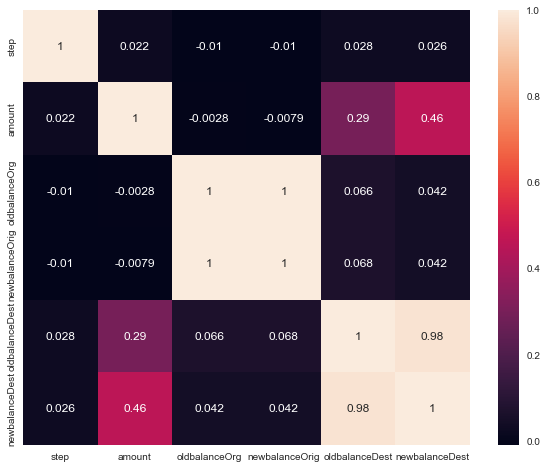

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True)
plt.show()

Correlação entre as seguintes variáveis: oldbalanceDest e newbalanceDest / oldbalanceOrg e newbalanceOrig. Isso porque quando o dinheiro é enviado a um destinatário, este aumenta seu capital, enquanto a origem diminui.

In [25]:
total = dataset['isFraud'].value_counts()[0] + fraude['isFraud'].value_counts()[1]
fraud = (fraude['isFraud'].value_counts()[1]/total) * 100
print('Porcentagem de fraude:', fraud)

Porcentagem de fraude: 0.12908204481801522


# Normalizacão dos dados

Como visto com a função describe(), há uma grande diferença na escala das variáveis numéricas. Vamos alterar os valores das colunas numéricas no conjunto de dados para uma escala comum, sem distorcer as diferenças nos intervalos de valores. Com isso, ao usarmos amount, por exemplo, ele influenciará resultado pela sua característica mas não devido aos valores maiores.

In [26]:
dataset

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,1,0,0,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,1,0,0,0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0,0,1,1,0
3,1,181.00,181.00,0.00,21182.00,0.00,0,1,0,0,0,1,0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.00,0.00,339682.13,0,1,0,0,0,1,0
6362616,743,6311409.28,6311409.28,0.00,0.00,0.00,0,0,0,0,1,1,0
6362617,743,6311409.28,6311409.28,0.00,68488.84,6379898.11,0,1,0,0,0,1,0
6362618,743,850002.52,850002.52,0.00,0.00,0.00,0,0,0,0,1,1,0


In [27]:
#Resetando index para não ter problema na concatenação depois
dataset.reset_index(drop= True, inplace= True)

In [28]:
# normalizando com Z-score
col_names = dataset.iloc[:,:6].columns
col_names

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [29]:
s_scaler = StandardScaler()
df_s = s_scaler.fit_transform(dataset.iloc[:,:6])
df_s = pd.DataFrame(df_s, columns=col_names)

In [30]:
# Concatenando os dados normalizados
dfnormal = pd.concat([df_s, dataset.iloc[:,6:]], axis = 1)

In [31]:
# Observa-se que agora as variáveis estão em uma faixa mais semelhante.
dfnormal

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud,isFlaggedFraud
0,-1.703042,-0.281560,-0.229810,-0.237622,-0.323814,-0.333411,0,0,0,1,0,0,0
1,-1.703042,-0.294767,-0.281359,-0.285812,-0.323814,-0.333411,0,0,0,1,0,0,0
2,-1.703042,-0.297555,-0.288654,-0.292442,-0.323814,-0.333411,0,0,0,0,1,1,0
3,-1.703042,-0.297555,-0.288654,-0.292442,-0.317582,-0.333411,0,1,0,0,0,1,0
4,-1.703042,-0.278532,-0.274329,-0.282221,-0.323814,-0.333411,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,3.510123,0.264665,-0.171108,-0.292442,-0.323814,-0.240959,0,1,0,0,0,1,0
6362616,3.510123,10.153953,1.896491,-0.292442,-0.323814,-0.333411,0,0,0,0,1,1,0
6362617,3.510123,10.153953,1.896491,-0.292442,-0.303665,1.403027,0,1,0,0,0,1,0
6362618,3.510123,1.109765,0.005581,-0.292442,-0.323814,-0.333411,0,0,0,0,1,1,0


# Divisão do Dataset

In [32]:
#Separar dados em treino e teste
X = dfnormal.drop(columns = ['isFraud', 'isFlaggedFraud'])
y = dfnormal['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# **Balanceamento das Classes**

Testaremos algumas formas de balanceamento dos dados, pois temos muitas informações a respeito de transações que não são fraudes, e muito pouca informação a respeito da categoria fraude, que é a que nos interessa. 

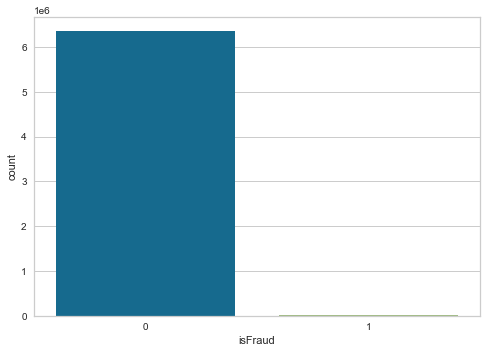

In [33]:
# Visualização da variável de interesse
g = sns.countplot(y)
plt.show()

In [34]:
len(X_train)

4262955

In [35]:
len(X_test)

2099665

## Baseline - Regressão Logística

In [36]:
logreg_baseline = LogisticRegression(max_iter=200)
logreg_baseline.fit(X_train, y_train)

y_pred_baseline = logreg_baseline.predict(X_test)

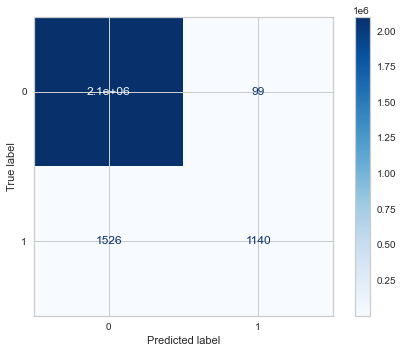

In [37]:
cm = confusion_matrix(y_test, y_pred_baseline)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg_baseline.classes_)
disp.plot(cmap='Blues')

In [38]:
print(classification_report(y_test, y_pred_baseline, target_names=['Fraud', 'Not Fraud']))

              precision    recall  f1-score   support

       Fraud       1.00      1.00      1.00   2096999
   Not Fraud       0.92      0.43      0.58      2666

    accuracy                           1.00   2099665
   macro avg       0.96      0.71      0.79   2099665
weighted avg       1.00      1.00      1.00   2099665



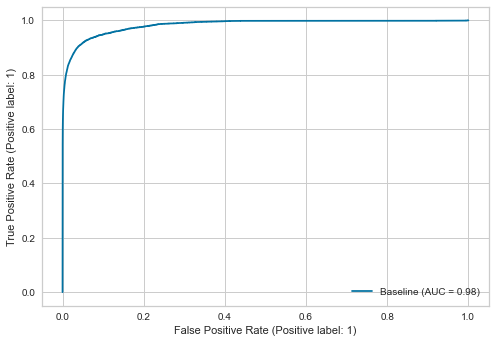

In [39]:
metrics.plot_roc_curve(logreg_baseline, X_train, y_train, name='Baseline')
plt.show()

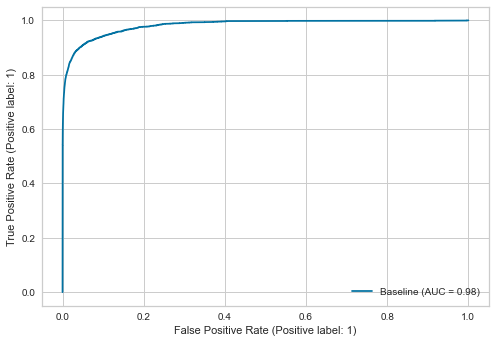

In [40]:
metrics.plot_roc_curve(logreg_baseline, X_test, y_test, name='Baseline')
plt.show()

## Logistic Regression - Classes Weights ('balanced')

In [41]:
logreg_balanced = LogisticRegression(class_weight='balanced')
logreg_balanced.fit(X_train, y_train)
y_pred = logreg_balanced.predict(X_test)

In [42]:
confusion_matrix(y_test, y_pred)

array([[1991418,  105581],
       [    149,    2517]], dtype=int64)

In [43]:
print(classification_report(y_test, y_pred, target_names=['Fraud', 'Not Fraud']))

              precision    recall  f1-score   support

       Fraud       1.00      0.95      0.97   2096999
   Not Fraud       0.02      0.94      0.05      2666

    accuracy                           0.95   2099665
   macro avg       0.51      0.95      0.51   2099665
weighted avg       1.00      0.95      0.97   2099665



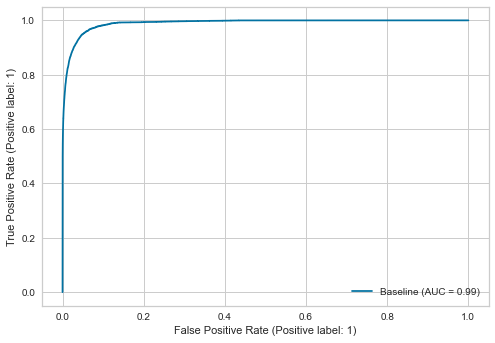

In [44]:
metrics.plot_roc_curve(logreg_balanced, X_train, y_train, name='Baseline')
plt.show()

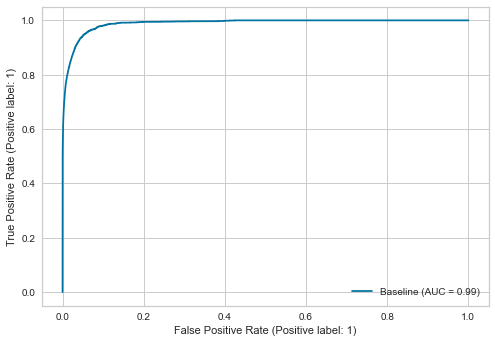

In [45]:
metrics.plot_roc_curve(logreg_balanced, X_test, y_test, name='Baseline')
plt.show()

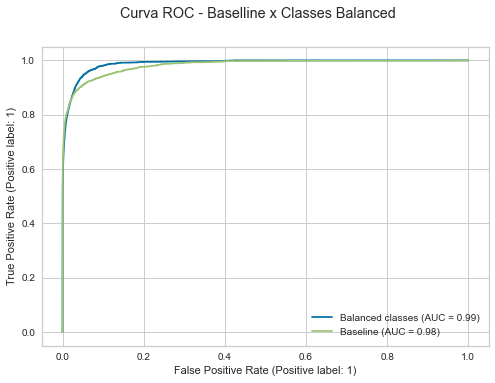

In [46]:
logreg_balanced_disp = metrics.plot_roc_curve(logreg_balanced, X_test, y_test, 
                                              name='Balanced classes')
logreg_baseline_disp = metrics.plot_roc_curve(logreg_baseline, X_test, y_test,
                                              name='Baseline', 
                                              ax=logreg_balanced_disp.ax_)
logreg_baseline_disp.figure_.suptitle("Curva ROC - Baselline x Classes Balanced")

plt.show()

## Balanceamento dos Dados com Over-Sampling (ADASYN)

In [47]:
ada = ADASYN(random_state=42, sampling_strategy=0.22, n_jobs=-1)
X_ada, y_ada = ada.fit_resample(X_train, y_train)
print('Resultado após o oversampling %s' % Counter(y_ada))

Resultado após o oversampling Counter({0: 4257408, 1: 937214})


In [48]:
len(X_ada[y_ada == 0])

4257408

In [49]:
len(X_ada[y_ada == 1])

937214

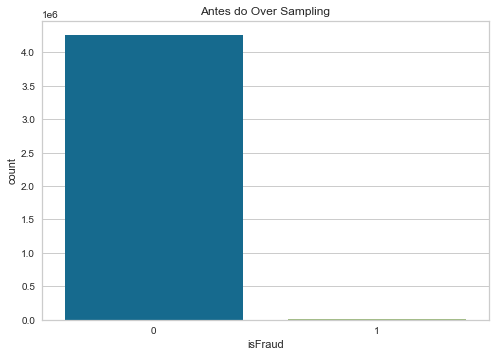

In [50]:
g = sns.countplot(y_train)
plt.title("Antes do Over Sampling")
plt.show()

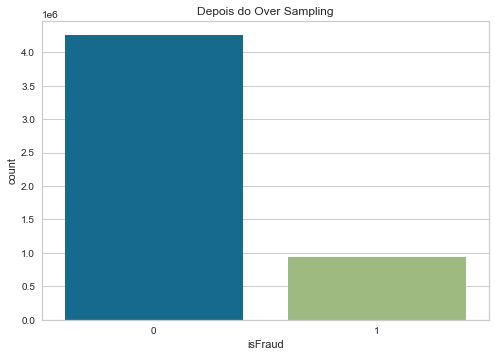

In [51]:
g = sns.countplot(y_ada)
plt.title("Depois do Over Sampling")
plt.show()

In [52]:
logreg2 = LogisticRegression(n_jobs=-1)
logreg2.fit(X_ada, y_ada)
y_pred2 = logreg2.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred2)

array([[2049846,   47153],
       [    122,    2544]], dtype=int64)

In [54]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99   2096999
           1       0.05      0.95      0.10      2666

    accuracy                           0.98   2099665
   macro avg       0.53      0.97      0.54   2099665
weighted avg       1.00      0.98      0.99   2099665



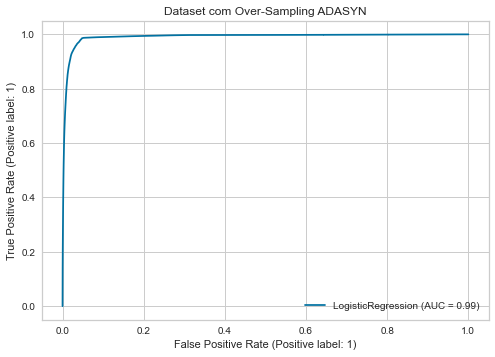

In [55]:
metrics.plot_roc_curve(logreg2, X_ada, y_ada)
plt.title("Dataset com Over-Sampling ADASYN")
plt.show()

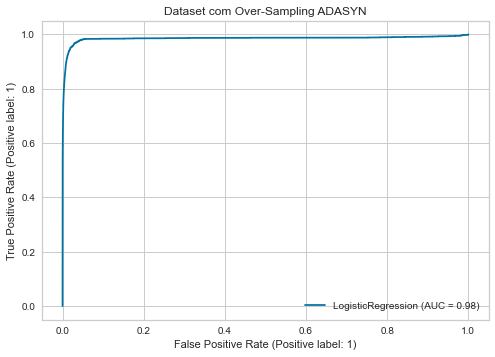

In [56]:
metrics.plot_roc_curve(logreg2, X_test, y_test)
plt.title("Dataset com Over-Sampling ADASYN")
plt.show()

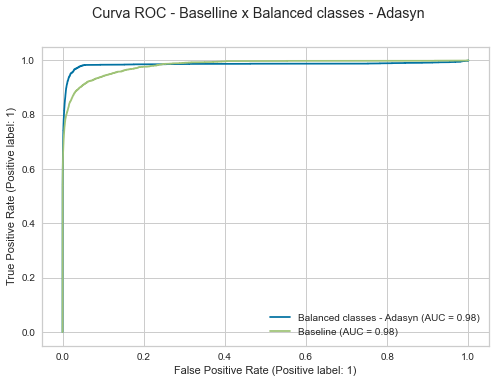

In [57]:
logreg_balanced_disp = metrics.plot_roc_curve(logreg2, X_test, y_test, 
                                              name='Balanced classes - Adasyn')
logreg_baseline_disp = metrics.plot_roc_curve(logreg_baseline, X_test, y_test,
                                              name='Baseline', 
                                              ax=logreg_balanced_disp.ax_)
logreg_baseline_disp.figure_.suptitle("Curva ROC - Baselline x Balanced classes - Adasyn")

plt.show()

## Balanceamento dos Dados com Over-Sampling (SMOTE)

In [58]:
smo = SMOTE(random_state=42, sampling_strategy=0.22, n_jobs=-1)
X_smo, y_smo = smo.fit_resample(X_train, y_train)
print('Resultado após o oversampling %s' % Counter(y_smo))

Resultado após o oversampling Counter({0: 4257408, 1: 936629})


In [59]:
len(X_smo[y_smo == 0])

4257408

In [60]:
len(X_smo[y_smo == 1])

936629

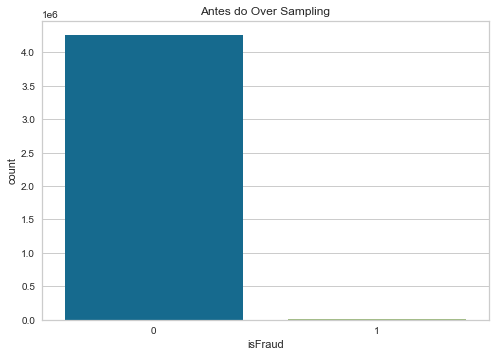

In [61]:
g = sns.countplot(y_train)
plt.title("Antes do Over Sampling")
plt.show()

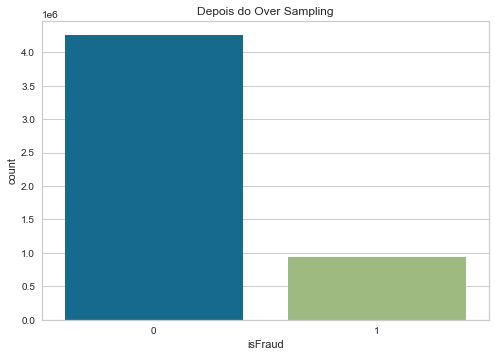

In [62]:
g = sns.countplot(y_smo)
plt.title("Depois do Over Sampling")
plt.show()

In [63]:
logreg3 = LogisticRegression(n_jobs=-1)
logreg3.fit(X_smo, y_smo)
y_pred3 = logreg3.predict(X_test)

In [64]:
confusion_matrix(y_test, y_pred3)

array([[2071485,   25514],
       [    372,    2294]], dtype=int64)

In [65]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99   2096999
           1       0.08      0.86      0.15      2666

    accuracy                           0.99   2099665
   macro avg       0.54      0.92      0.57   2099665
weighted avg       1.00      0.99      0.99   2099665



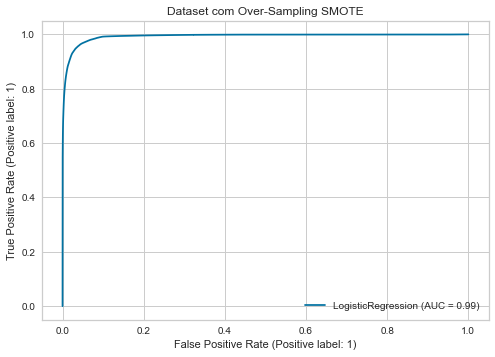

In [66]:
metrics.plot_roc_curve(logreg3, X_smo, y_smo)
plt.title("Dataset com Over-Sampling SMOTE")
plt.show()

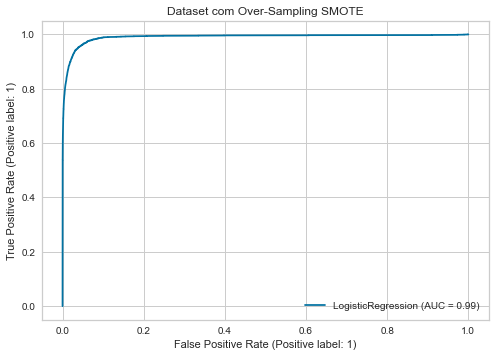

In [67]:
metrics.plot_roc_curve(logreg3, X_test, y_test)
plt.title("Dataset com Over-Sampling SMOTE")
plt.show()

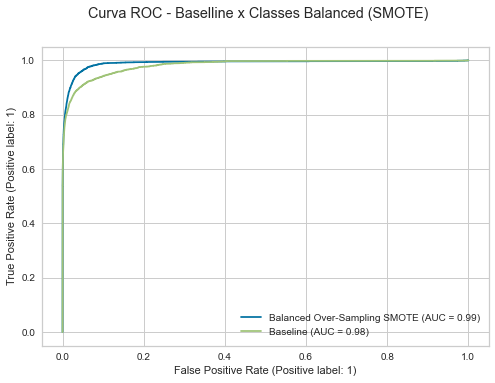

In [68]:
logreg_balanced_disp = metrics.plot_roc_curve(logreg3, X_test, y_test, 
                                              name='Balanced Over-Sampling SMOTE')
logreg_baseline_disp = metrics.plot_roc_curve(logreg_baseline, X_test, y_test,
                                              name='Baseline', 
                                              ax=logreg_balanced_disp.ax_)
logreg_baseline_disp.figure_.suptitle("Curva ROC - Baselline x Classes Balanced (SMOTE)")

plt.show()

## Análise do Balanceamento

In [69]:
infor = {'Estratégia': ['Baseline RL', 'RL', 'ADASYN', 'SMOTE'], 
          'Acurácia': [1, 0.95, 0.98, 0.99], 
          'Precision': [1, 1, 1, 1], 
          'Recall': [1, 0.95, 0.98, 0.99], 
          'F1 Score': [1, 0.97, 0.99, 0.99], 
          'AUC': [0.98, 0.99, 0.99, 0.99]}
resultado_balanceamento = pd.DataFrame(data=infor)

In [70]:
resultado_balanceamento

,Estratégia,Acurácia,Precision,Recall,F1 Score,AUC
0,Baseline RL,1.00,1,1.00,1.00,0.98
1,RL,0.95,1,0.95,0.97,0.99
2,ADASYN,0.98,1,0.98,0.99,0.99
3,SMOTE,0.99,1,0.99,0.99,0.99


# Análise dos Resultados

Foi escolhido o balanceamento por SMOTE para aplicar o modelo de classificação.

In [71]:
#Construção do dataset para análises finais
y_df = pd.DataFrame(y_smo, columns=['isFraud'])

X_df = pd.DataFrame(X_smo, columns=['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 
                                    'CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER'])

newdf = pd.concat([X_df, y_df], axis=1)
newdf

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER,isFraud
0,-0.782658,0.011812,-0.286992,-0.226788,0.430916,0.272389,1,0,0,0,0,0
1,-0.775632,-0.154812,-0.277817,-0.292442,-0.323814,-0.309902,0,1,0,0,0,0
2,-0.782658,0.058999,-0.281266,-0.292442,1.543035,1.515994,0,1,0,0,0,0
3,2.421120,0.856919,-0.279890,-0.292442,0.308762,0.441618,0,0,0,0,1,0
4,0.559275,-0.199746,-0.278371,-0.292442,-0.323814,-0.333411,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5194032,-1.524852,0.155357,-0.193961,-0.292442,0.661015,0.652206,0,1,0,0,0,1
5194033,-0.331480,1.597426,0.107539,-0.292442,0.753570,0.974845,0,1,0,0,0,1
5194034,0.755845,0.082281,-0.209240,-0.292442,-0.323814,-0.270935,0,1,0,0,0,1
5194035,3.420432,-0.014484,-0.229471,-0.292442,-0.082829,-0.063887,0,1,0,0,0,1


## Decision tree

### Decision Tree com dados desbalanceados

In [72]:
DT = tree.DecisionTreeClassifier()

DT.fit(X_train, y_train)

predictions = DT.predict(X_test)

In [73]:
print(DT.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, DT.predict(X_test)))

0.9997166214610426
[[2096728     271]
 [    324    2342]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.90      0.88      0.89      2666

    accuracy                           1.00   2099665
   macro avg       0.95      0.94      0.94   2099665
weighted avg       1.00      1.00      1.00   2099665



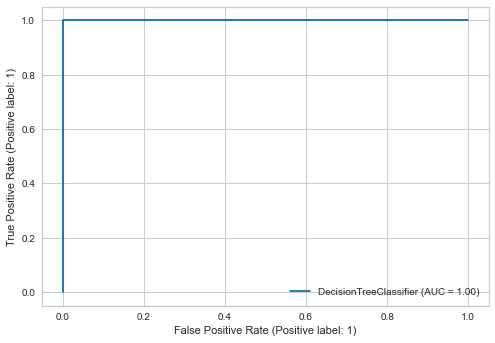

In [74]:
plot_roc_curve(DT, X_train, y_train)

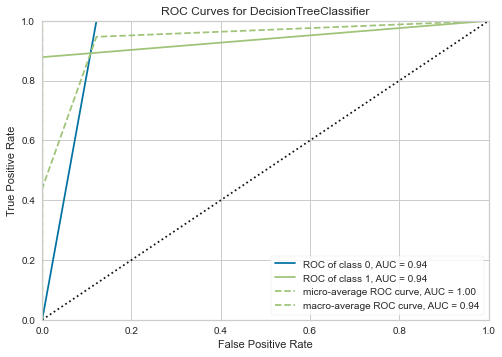

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier())

In [75]:
roc_auc(DT, X_train, y_train, X_test=X_test, y_test=y_test)

In [76]:
DT.score(X_train, y_train)

1.0

In [77]:
DT.score(X_test, y_test)

0.9997166214610426

### Decision Tree com dados balanceados

In [81]:
DT2 = tree.DecisionTreeClassifier()

DT2.fit(X_df, y_df)

predictions2 = DT2.predict(X_test)

In [82]:
print(DT2.score(X_test, y_test))
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, DT2.predict(X_test)))

0.9994432445175778
[[2095915    1084]
 [     85    2581]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.70      0.97      0.82      2666

    accuracy                           1.00   2099665
   macro avg       0.85      0.98      0.91   2099665
weighted avg       1.00      1.00      1.00   2099665



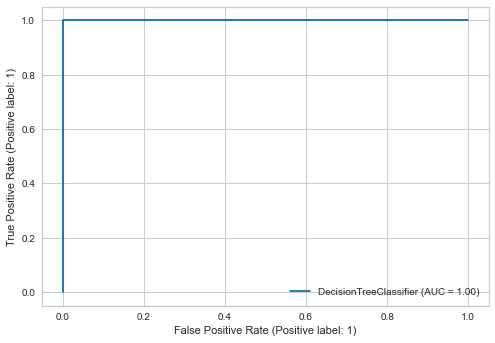

In [84]:
plot_roc_curve(DT2, X_df, y_df)

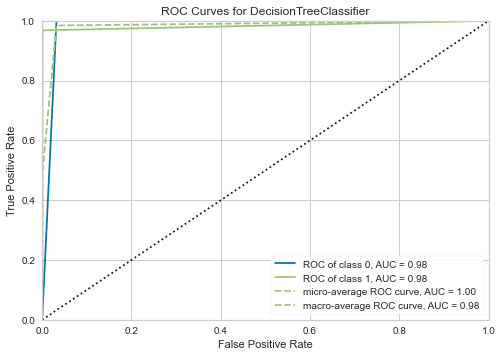

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier())

In [85]:
roc_auc(DT2, X_df, y_df, X_test=X_test, y_test=y_test)

In [86]:
DT2.score(X_df, y_df)

1.0

In [87]:
DT2.score(X_test, y_test)

0.9994432445175778

## Random Forest

### Random Forest com dados desbalanceados

In [88]:
RF = RandomForestClassifier()

RF.fit(X_train, y_train)

predictions = RF.predict(X_test)

In [89]:
print(RF.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, RF.predict(X_test)))

0.9997075723984541
[[2096953      46]
 [    568    2098]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.98      0.79      0.87      2666

    accuracy                           1.00   2099665
   macro avg       0.99      0.89      0.94   2099665
weighted avg       1.00      1.00      1.00   2099665



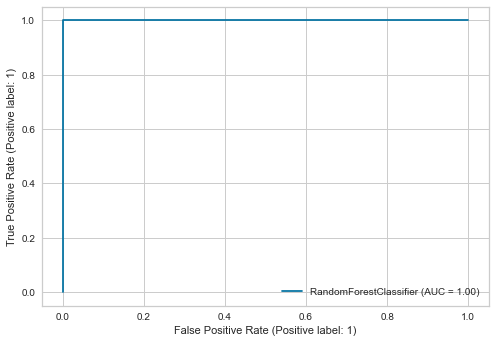

In [90]:
plot_roc_curve(RF, X_train, y_train)

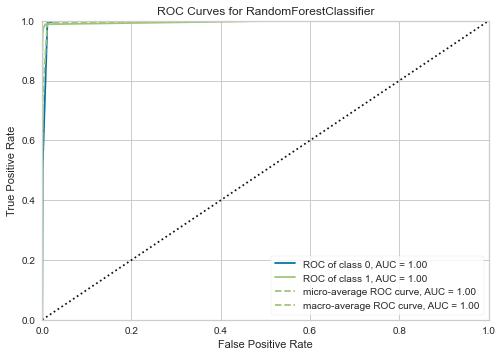

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier())

In [91]:
roc_auc(RF, X_train, y_train, X_test=X_test, y_test=y_test)

In [92]:
RF.score(X_train, y_train)

0.9999997654209345

In [93]:
RF.score(X_test, y_test)

0.9997075723984541

### Random Forest com dados balanceados

In [94]:
RF2 = RandomForestClassifier()

RF2.fit(X_df, y_df)

predictions2 = RF2.predict(X_test)

In [95]:
print(RF2.score(X_test, y_test))
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, RF2.predict(X_test)))

0.9992903629864764
[[2095630    1369]
 [    121    2545]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.65      0.95      0.77      2666

    accuracy                           1.00   2099665
   macro avg       0.83      0.98      0.89   2099665
weighted avg       1.00      1.00      1.00   2099665



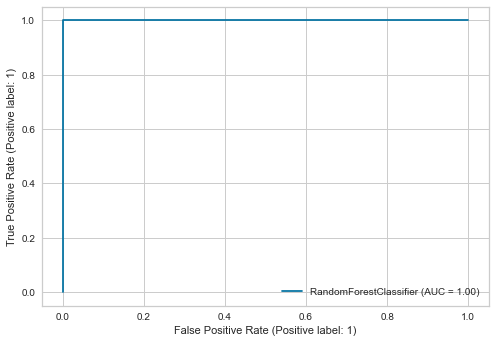

In [96]:
plot_roc_curve(RF2, X_train, y_train)

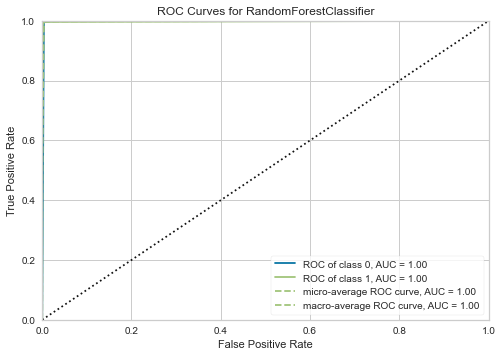

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier())

In [97]:
roc_auc(RF2, X_df, y_df, X_test=X_test, y_test=y_test)

In [98]:
RF2.score(X_df, y_df)

1.0

In [99]:
RF2.score(X_test, y_test)

0.9992903629864764

## Regressão Logística

### Regressão Logística com dados desbalanceados

In [100]:
LR = LogisticRegression()

LR.fit(X_train, y_train)

predictions = LR.predict(X_test)

In [101]:
print(LR.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, LR.predict(X_test)))

0.9992260670154525
[[2096900      99]
 [   1526    1140]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.92      0.43      0.58      2666

    accuracy                           1.00   2099665
   macro avg       0.96      0.71      0.79   2099665
weighted avg       1.00      1.00      1.00   2099665



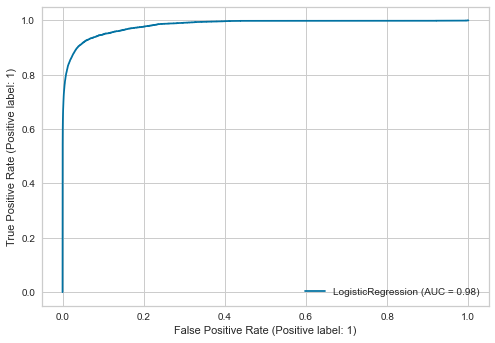

In [102]:
plot_roc_curve(LR, X_train, y_train)

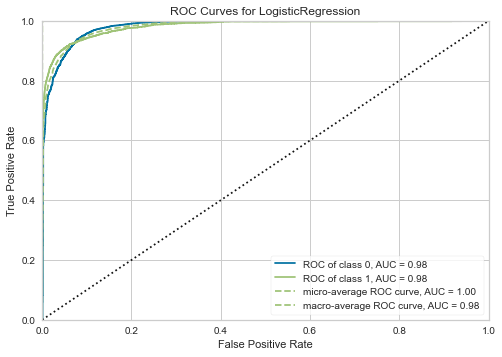

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=LogisticRegression())

In [103]:
roc_auc(LR, X_train, y_train, X_test=X_test, y_test=y_test)

In [104]:
LR.score(X_train, y_train)

0.9992127526563147

In [105]:
LR.score(X_test, y_test)

0.9992260670154525

### Regressão Logística com dados balanceados

In [106]:
LR2 = LogisticRegression()

LR2.fit(X_df, y_df)

predictions2 = LR2.predict(X_test)

In [107]:
print(LR2.score(X_test, y_test))
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, LR2.predict(X_test)))

0.987675653020839
[[2071494   25505]
 [    372    2294]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99   2096999
           1       0.08      0.86      0.15      2666

    accuracy                           0.99   2099665
   macro avg       0.54      0.92      0.57   2099665
weighted avg       1.00      0.99      0.99   2099665



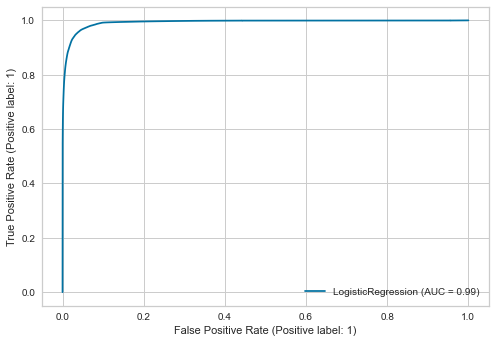

In [108]:
plot_roc_curve(LR2, X_df, y_df)

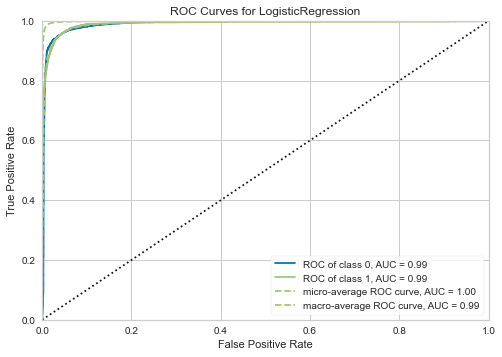

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=LogisticRegression())

In [109]:
roc_auc(LR2, X_df, y_df, X_test=X_test, y_test=y_test)

In [110]:
LR2.score(X_df, y_df)

0.9680552910963091

In [111]:
LR2.score(X_test, y_test)

0.987675653020839

## XGBoosting

### XGB com dados desbalanceados

In [112]:
XG = XGBClassifier()

XG.fit(X_train, y_train)

predictions = XG.predict(X_test)

In [113]:
print(XG.score(X_test, y_test))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, XG.predict(X_test)))

0.9998104459520923
[[2096931      68]
 [    330    2336]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.97      0.88      0.92      2666

    accuracy                           1.00   2099665
   macro avg       0.99      0.94      0.96   2099665
weighted avg       1.00      1.00      1.00   2099665



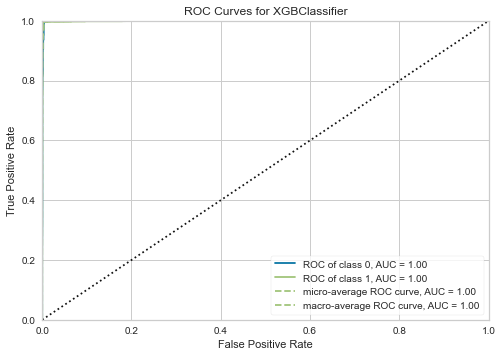

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               pre

In [114]:
roc_auc(XG, X_train, y_train, X_test=X_test, y_test=y_test)

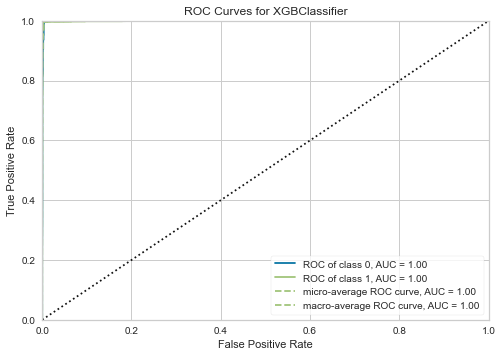

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               pre

In [115]:
roc_auc(XG, X_train, y_train, X_test=X_test, y_test=y_test)

In [116]:
XG.score(X_train, y_train)

0.999886932890448

In [117]:
XG.score(X_test, y_test)

0.9998104459520923

### XGB com dados balanceados

In [118]:
XG2 = XGBClassifier()

XG2.fit(X_df, y_df)

predictions2 = XG2.predict(X_test)

In [119]:
print(XG2.score(X_test, y_test))
print(confusion_matrix(y_test, predictions2))
print(classification_report(y_test, XG2.predict(X_test)))

0.9988636282454582
[[2094643    2356]
 [     30    2636]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2096999
           1       0.53      0.99      0.69      2666

    accuracy                           1.00   2099665
   macro avg       0.76      0.99      0.84   2099665
weighted avg       1.00      1.00      1.00   2099665



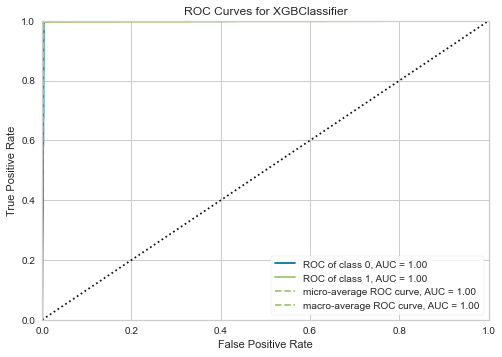

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               pre

In [120]:
roc_auc(XG2, X_df, y_df, X_test=X_test, y_test=y_test)

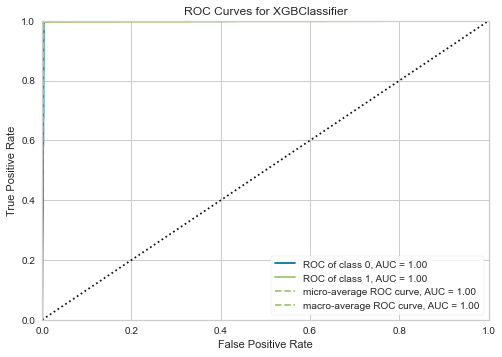

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=100, n_jobs=0, num_parallel_tree=1,
                               pre

In [121]:
roc_auc(XG2, X_df, y_df, X_test=X_test, y_test=y_test)

In [122]:
XG2.score(X_df, y_df)

0.999022532954617

In [123]:
XG2.score(X_test, y_test)

0.9988636282454582

# Comparando os modelos

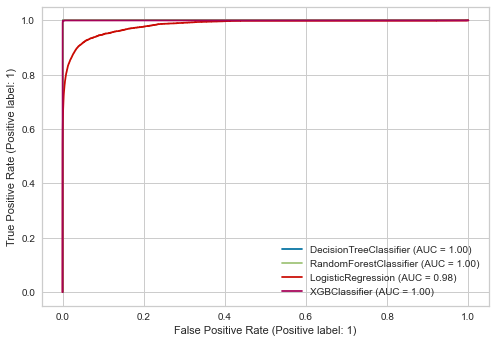

In [124]:
#Dados desbalanceados
classifiers = [DT, RF, LR, XG]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_train, y_train, ax=ax)

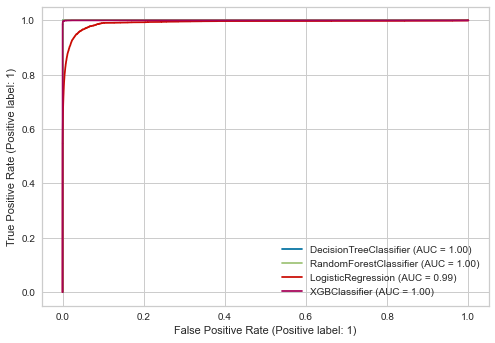

In [125]:
#Dados balanceados
classifiers = [DT2, RF2, LR2, XG2]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_train, y_train, ax=ax)

Com o classificador XGBoosting com dados desbalanceados, 87% das fraudes foram detectadas corretamente.